In [1]:
import tensorflow as tf

In [2]:
import tensorflow_addons as tfa

In [3]:
# Foreigner_Male_4/20200914_night_normal_01/Class_1/frame/0_20200914_night_normal_01/0_20200914_night_normal_01_1 05.jpg
# 399.0 89.0 168.0 196.0 431 141 0 -1 -1 0 490 138 0 513 141 0 450 128 0 451 139 0 529 128 0 530 138 0 451 157 0 -1 -1 0 481 157 0 515 158 0 467 148 0 468 161 0 528 150 0 528 162 0 495 198 0 -1 -1 0 535 187 0 525 204 0 490 241 0 -1 -1 0 527 228 0 527 234 0 527 235 0 528 246 0 1

In [4]:
landm = tf.constant([[399, 89, 168, 196, 431, 141, 490, 138, 513, 141, 450, 128, 451, 139, 529, 128, 530, 138, 451, 157, 481, 157, 515, 158, 467, 148, 468, 161, 528, 150, 528, 162, 495, 198, 535, 187, 525, 204, 490, 241, 527, 228, 527, 234, 527, 235, 528, 246 ], [399, 89, 168, 196, 431, 141, 490, 138, 513, 141, 450, 128, 451, 139, 529, 128, 530, 138, 451, 157, 481, 157, 515, 158, 467, 148, 468, 161, 528, 150, 528, 162, 495, 198, 535, 187, 525, 204, 490, 241, 527, 228, 527, 234, 527, 235, 528, 246 ]] , dtype=tf.int32)

In [5]:
image_encoded = tf.io.read_file("dataset/0_20200914_night_normal_01_1 05.jpg")
img = tf.image.decode_jpeg(image_encoded, channels=3)

In [6]:
img_right = tfa.image.rotate(img, tf.constant(-0.15))

In [7]:
landm_right = tfa.image.rotate(landm, tf.constant(-0.15))

In [8]:
img_left = tfa.image.rotate(img, tf.constant(0.15))

In [9]:
landm_left = tfa.image.rotate(landm, tf.constant(0.15))

In [10]:
type(img)

tensorflow.python.framework.ops.EagerTensor

In [11]:
import matplotlib.pyplot as plt

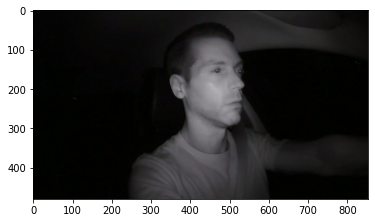

In [12]:
plt.imshow(img)

In [13]:
img.shape

TensorShape([480, 853, 3])

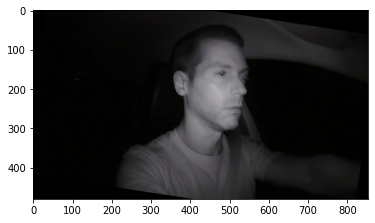

In [14]:
plt.imshow(img_right)

In [15]:
img_right.shape

TensorShape([480, 853, 3])

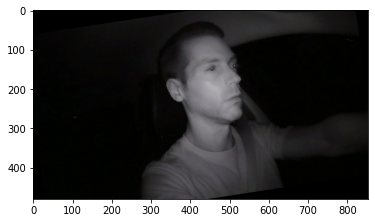

In [16]:
plt.imshow(img_left)

In [17]:
img_left.shape

TensorShape([480, 853, 3])

In [22]:
import tensorflow_graphics as tfg
from tensorflow_graphics.geometry import transformation

In [23]:
landm = [399, 89, 168, 196, 431, 141, 490, 138, 513, 141, 450, 128, 451, 139, 529, 128, 530, 138, 451, 157, 481, 157, 515, 158, 467, 148, 468, 161, 528, 150, 528, 162, 495, 198, 535, 187, 525, 204, 490, 241, 527, 228, 527, 234, 527, 235, 528, 246 ]

In [24]:
points = tf.reshape(landm, (-1,2))

In [25]:
points = tf.cast(points, dtype=tf.float32)

In [26]:
matrix = tfg.geometry.transformation.rotation_matrix_2d.from_euler(tf.constant([0.03]))
rotated_points = tfg.geometry.transformation.rotation_matrix_2d.rotate(points, matrix)

In [30]:
import cv2

In [31]:
img_right = img_right.numpy()

In [34]:
import numpy as np
landm_points = tf.reshape(landm, (-1,2))

In [37]:
for i in range(0,24):
    img_right = cv2.circle(img_right, (rotated_points[i].numpy()[0], rotated_points[i].numpy()[1]), 4, (0,255,255), -1)

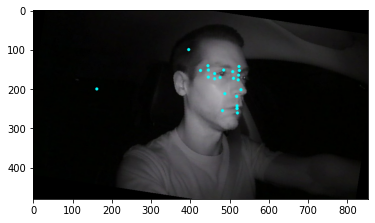

In [61]:
plt.imshow(img_right)

# CV2 getRotationMatrix2D

In [62]:
h, w, c = img.shape

In [63]:
img = img.numpy()

In [64]:
cX, cY = w // 2, h // 2

In [70]:
# grab the rotation matrix (applying the negative of the
# angle to rotate clockwise), then grab the sine and cosine
# (i.e., the rotation components of the matrix)
M = cv2.getRotationMatrix2D((cX, cY), -15, 1.0)
dst = cv2.warpAffine(img, M, (w, h))

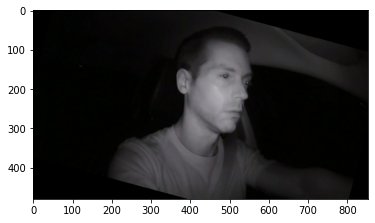

In [71]:
plt.imshow(dst)

In [75]:
landm = np.reshape(landm, (-1,2))

In [77]:
# add ones
ones = np.ones(shape=(len(landm), 1))

landm_ones = np.hstack([landm, ones])

# transform points
new_landm = M.dot(landm_ones.T).T

In [80]:
new_landm

array([[439.0016785 ,  87.15708601],
       [188.1791748 , 130.72395001],
       [456.4527146 , 145.66743842],
       [514.21879548, 158.03998461],
       [535.65863235, 166.89060012],
       [478.16995288, 138.02796454],
       [476.28886921, 148.91196767],
       [554.47809316, 158.4746691 ],
       [552.85582853, 168.39274641],
       [471.6301264 , 166.29863255],
       [500.60790119, 174.0632039 ],
       [533.19056024, 183.82897726],
       [489.41431103, 161.74640483],
       [487.01558927, 174.56225962],
       [547.81814834, 179.46621823],
       [544.7123198 , 191.05732815],
       [503.51928191, 217.28962941],
       [545.00332446, 217.01720712],
       [530.94414243, 230.84975572],
       [487.56043384, 257.53034471],
       [526.664337  , 254.54961364],
       [525.11142273, 260.3451686 ],
       [524.85260368, 261.31109442],
       [522.97152001, 272.19509756]])

In [82]:
for i in range(0,24):
    dst = cv2.circle(dst, (int(new_landm[i][0]), int(new_landm[i][1])), 4, (0,255,255), -1)

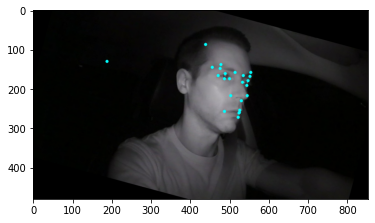

In [83]:
plt.imshow(dst)